In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pyCalc as p
import random
import math

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import pyCalc as p
import random

np.random.seed(1)

p.setMode("loud")

xs = p.constant(X_train[:54000,:]) #54000x784
X_test = X_train[-100:,:]
del X_train
y_train = mnist.train.labels[:54000]
y_train = [[1 if n == i else 0 for n in range(10)] for i in y_train]
Y_test = mnist.train.labels[-100:]
Y_test = [[1 if n == i else 0 for n in range(10)] for i in Y_test]
ys = p.constant(np.array(y_train, dtype=float)) #54000x10
del y_train
del mnist

In [4]:
weights =2*np.random.random((784,10)) - 1
ws = p.var("independent", 784,10)

l0 = p.function(xs, ws, "*") #54000x10
l1 = p.function(l0, "softmax") #54000x10

          rows 784 colss 10
          valid
          output will be 54000 x 10
          output will be 54000 x 10


In [5]:
p.function(l0, "softmax_r").value(dict([(ws,weights)]))[0]

          output will be 54000 x 10


array([ 0.08979221,  0.08979221,  0.        ,  0.        ,  0.08979221,
        0.        ,  0.08979221,  0.08979221,  0.        ,  0.08979221])

In [6]:
cost = p.function(ys, p.function(l1, "ln"), "elementwise*")
l1_error = p.function(ys, l1, "elementwise/") #54000x10
l1_delta = p.function(l1_error, p.function(l0, "softmax_r"), "elementwise*") #54000x10
tmp = p.function(xs.T(), l1_delta, "*") #784x10

          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          trans
          output will be 784 x 54000
          valid
          output will be 784 x 10


Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise* >left is a 54000x10 matrix but right is a 54000x10 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise/ >left is a 54000x10 matrix but right is a 54000x10 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise* >left is a 54000x10 matrix but right is a 54000x10 matrix


In [7]:
def acc():
    out = 0
    yss = ys.value().tolist()
    y_ = l1.value(dict([(ws,weights)])).tolist()
    for i in range(len(ys.value())):
        if yss[i].index(max(yss[i])) == y_[i].index(max(y_[i])):
            out +=1

    print(out/ len(ys.value()))

In [8]:
g = []
for i in range(500):
    weights = weights + 0.001 * tmp.value(dict([(ws,weights)]))
    g.append(sum([sum([-bb for bb in d]) for d in cost.value(dict([(ws,weights)])).tolist()]))
    if (i+1)%10 ==0:
        acc()
        print("that's after ", i+1)


0.10148148148148148
that's after  10
0.10164814814814815
that's after  20
0.10211111111111111
that's after  30
0.10224074074074074
that's after  40
0.10268518518518518
that's after  50
0.10357407407407407
that's after  60
0.10446296296296297
that's after  70
0.10505555555555555
that's after  80
0.10548148148148148
that's after  90
0.10581481481481482
that's after  100
0.10605555555555556
that's after  110
0.10690740740740741
that's after  120
0.10724074074074075
that's after  130
0.10766666666666666
that's after  140
0.10803703703703704
that's after  150
0.10822222222222222
that's after  160
0.10868518518518519
that's after  170
0.10907407407407407
that's after  180
0.10942592592592593
that's after  190
0.10981481481481481
that's after  200
0.1097962962962963
that's after  210
0.1102962962962963
that's after  220
0.11022222222222222
that's after  230
0.11062962962962963
that's after  240
0.11070370370370371
that's after  250
0.1112962962962963
that's after  260
0.11133333333333334
that

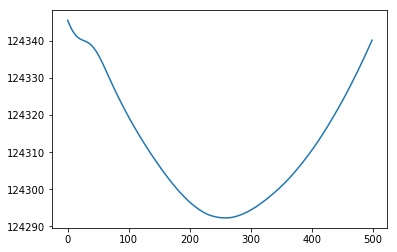

In [9]:
import matplotlib.pyplot as plt

plt.plot(g)

plt.show()